<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import load_model

from keras.datasets.cifar100 import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [47]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
y_train.shape

(50000, 1)

In [49]:
x_test.shape

(10000, 32, 32, 3)

In [50]:
y_test.shape

(10000, 1)

Hinh so: [28]


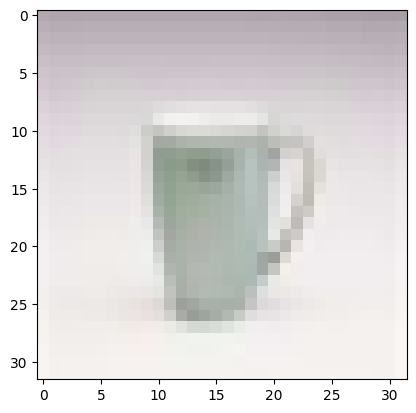

In [51]:
import matplotlib.pyplot as plt
hinh= x_train[7]   #Lấy hình ở vị trí thứ 7
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("Hinh so:",y_train[7])

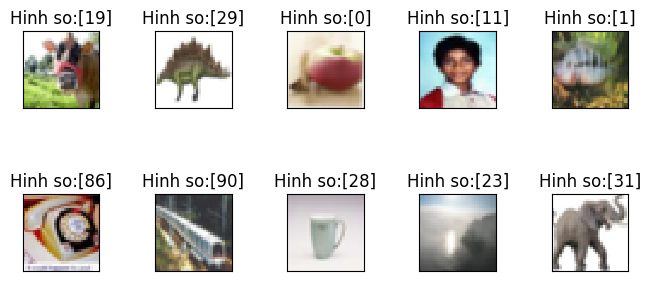

In [52]:
for i in range(10):
  plt.subplot(3,5,i+1)  
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("Hinh so:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [53]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(100, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,624,676
Trainable params: 1,624,676
Non-trainable params: 0
_________________________________________________________________


In [54]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [55]:
#Lệnh chuyển qua
y_train = to_categorical(y_train, 100) 
y_test = to_categorical(y_test, 100)

In [56]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 50000 dữ liệu , học tổng cộng 10 lần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
391/391 [==============================] - 13s 32ms/step - loss: 9.0562 - accuracy: 0.0099
Epoch 2/10
391/391 [==============================] - 12s 31ms/step - loss: 8.8495 - accuracy: 0.0100
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 5/10
391/391 [==============================] - 12s 32ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 6/10
391/391 [==============================] - 12s 32ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 7/10
391/391 [==============================] - 12s 32ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 8/10
391/391 [==============================] - 12s 32ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 9/10
391/391 [==============================] - 12s 31ms/step - loss: 9.0606 - accuracy: 0.0100
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 9.0729 

In [57]:
#Lưu file vừa train
model.save('model_cifar100.h5')

In [58]:
# Tải mô hình từ file đã lưu
model = load_model('./model_cifar100.h5')